# SVM
Breast Cancer Wisconsin（Diagnostic）のデータセットを使用して、SVMアルゴリズムによるモデルを構築し、乳がんを分類

## SVMとは

SVMとは分類と回帰の両方に利用可能な教師あり学習のモデルです。  

2次元の特徴量を持つデータに対し、線形モデルによって2クラス分類を行うことを考えます。  
学習データのプロットされた平面上に直線を引いて領域を2つに分ける作業で、分類とは線を引くことであり、SVMはうまい具合に線を引く方法です。  
SVMではどの点にも被らないようにできるだけ広い帯を引こうとします。

- メリット  
他のモデルと比較して高い識別性能が得られる  
- デメリット  
データの前処理やパラメーターの調整、結果の解釈が難しい  
- 特徴  
「マージン」という「距離のような概念」の最大化を目的としている。  
平均や分散を使わないので新しいデータが入ってきても全体の再計算は不要。  
線形分離が不可能な場合は、「非線形変換を施したうえでより高次元特徴空間に写像」することで対応できる。

## SVMにおけるカーネルとは

元の次元では分離できないデータを高次元に非線形写像するために用いる関数のこと  
よく用いられるカーネル
- RBF(動径基底関数、ガウス関数)
- 多項式
- シグモイド

## 線形回帰やロジスティック回帰との比較

- SVMはカーネルにRBFや多項式などを用いることで非線形問題にも対応できる
- SVMにおいて学習結果に影響を与えるのは分離線（面）に近い点（サポートベクター）であるため、訓練データに外れ値が含まれていてもその影響を受けにくい

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# データ・セットの用意
UCIのBreast Cancer Wisconsin（Diagnostic）Data Setを使用    
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [5]:
df = pd.read_csv("input/bcwd.txt",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## カラム名付与

In [8]:
df.columns=[
    "ID",
    "diagnosis",

    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave_points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",

    "radius_std",
    "texture_std",
    "perimeter_std",
    "area_std",
    "smoothness_std",
    "compactness_std",
    "concavity_std",
    "concave_points_std",
    "symmetry_std",
    "fractal_dimension_std",

    "radius_largest",
    "texture_largest",
    "perimeter_largest",
    "area_largest",
    "smoothness_largest",
    "compactness_largest",
    "concavity_largest",
    "concave_points_largest",
    "symmetry_largest",
    "fractal_dimension_largest"
]

df.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_points_std,symmetry_std,fractal_dimension_std,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                           569 non-null int64
diagnosis                    569 non-null object
radius_mean                  569 non-null float64
texture_mean                 569 non-null float64
perimeter_mean               569 non-null float64
area_mean                    569 non-null float64
smoothness_mean              569 non-null float64
compactness_mean             569 non-null float64
concavity_mean               569 non-null float64
concave_points_mean          569 non-null float64
symmetry_mean                569 non-null float64
fractal_dimension_mean       569 non-null float64
radius_std                   569 non-null float64
texture_std                  569 non-null float64
perimeter_std                569 non-null float64
area_std                     569 non-null float64
smoothness_std               569 non-null float64
compactness_std              569 non-null float6

- カラム数：32
    - ID：整数値（1）
    - 診断結果：カテゴリカルデータ（1）
    - 特徴量：小数値  （30）
- 総データ数：569  
- 欠損値なし  

In [10]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

診断結果    
B：良性357例  
M：悪性212例

## カテゴリカルデータの数値化

In [133]:
# 目的変数として分離
df_y=df["diagnosis"]
# 良性を0、悪性を1にマッピング
mapping={'B':0, 'M':1}
df_y=df_y.map(mapping)

## 説明変数のみのデータセットを用意


In [16]:
df_x=df.drop(["ID", "diagnosis"], axis=1)
df_x.head(100)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_points_std,symmetry_std,fractal_dimension_std,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.217,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.856,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750


## 標準化

In [18]:
df_x=(df_x-df_x.mean())/np.std(df_x)
df_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_points_std,symmetry_std,fractal_dimension_std,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## データセットの分割
testデータとtrainデータに分割

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.2, random_state=0)

X_train、X_testのデータ数をチェック

In [23]:
print("X_train："+str(X_train.shape[0]))
print("X_test："+str(X_test.shape[0]))

X_train：455
X_test：114


# モデルの作成

## チューニング

In [393]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [
    { 'C': [1, 10, 100, 1000], 'kernel': ['linear'] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001] }
]

clf = GridSearchCV(
    SVC(),
    tuned_parameters, #最適化したいパラメータセット
    scoring="recall",
    cv=5, # k分割交差検証の回数
) 

In [394]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [395]:
clf.grid_scores_

[mean: 0.95758, std: 0.04111, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.95152, std: 0.05620, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.95152, std: 0.05284, params: {'C': 100, 'kernel': 'linear'},
 mean: 0.94545, std: 0.04848, params: {'C': 1000, 'kernel': 'linear'},
 mean: 0.84848, std: 0.05421, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.26667, std: 0.04454, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.92727, std: 0.04111, params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.84848, std: 0.05421, params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.95758, std: 0.04535, params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.92727, std: 0.04111, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.96364, std: 0.04454, params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.95758, std: 0.03090, params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.00000, std: 0.00000, params: {'C': 1, 'degree': 2

In [41]:
clf.best_score_

0.9636363636363637

In [42]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

# 評価

In [145]:
y_pred = clf.predict(X_test) 

In [195]:
# 混同行列作成
# - confusion_matrix(実測値, 予測値)
# - 1：positive（悪性）、0：negative（良性）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  2],
       [ 1, 46]])

In [200]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# TN｜FP
# FN｜TP

In [150]:
y_test=y_test.reset_index().drop("index", axis=1).rename(columns={"diagnosis":"test"})
y_pred=pd.DataFrame(y_pred).rename(columns={0:"pred"})
pred_test=pd.concat([y_pred, y_test], axis=1)

In [182]:
# - 1：positive（悪性）、0：negative（良性）
TP=len(pred_test[(pred_test['pred'] == 1) & (pred_test['test'] == 1)])
FN=len(pred_test[(pred_test['pred'] == 0) & (pred_test['test'] == 1)])
FP=len(pred_test[(pred_test['pred'] == 1) & (pred_test['test'] == 0)])
TN=len(pred_test[(pred_test['pred'] == 0) & (pred_test['test'] == 0)])


## Accuracy

In [183]:
# sklearnライブラリー
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [184]:
# スクラッチ
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9736842105263158

## Recall

In [185]:
# sklearnライブラリー
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9787234042553191

In [187]:
# スクラッチ
recall = TP / (TP + FN)
recall

0.9787234042553191

## Precision

In [188]:
# sklearnライブラリー
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9583333333333334

In [189]:
# スクラッチ
precision = TP / (TP + FP)
precision 

0.9583333333333334

## F1-measure

In [190]:
# sklearnライブラリー
from sklearn.metrics import f1_score
f1_score(y_test, y_pred) 

0.968421052631579

In [191]:
# スクラッチ
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.968421052631579

## ROC曲線
 http://scikit-learn.org/0.19/modules/svm.html

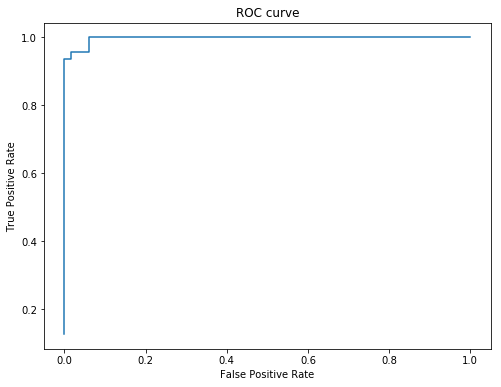

In [209]:
# sklearnライブラリー
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

clf =SVC(kernel='rbf', gamma=0.001, C=100, probability=True).fit(X_train, y_train)
prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

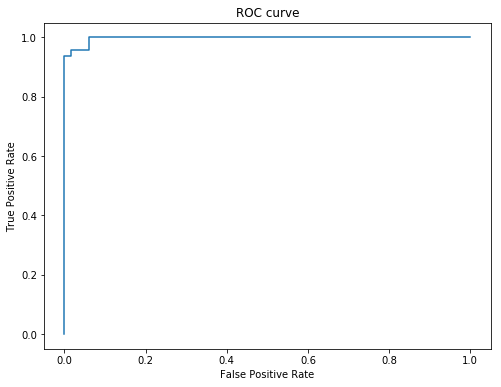

In [272]:
# スクラッチ

# 閾値
x=np.arange(101)/100
# 真陽性率
true_rate=[]
# 偽陽性率
false_rate=[]

for i in range(101):
    y_pred=pd.DataFrame((prob>x[i]).astype(int)).rename(columns={0:"pred"})
    pred_test=pd.concat([y_pred,y_test], axis=1)
    tp=sum((pred_test["pred"]==1)&(pred_test["test"]==1))
    fn=sum((pred_test["pred"]==0)&(pred_test["test"]==1))
    fp=sum((pred_test["pred"]==1)&(pred_test["test"]==0))
    tn=sum((pred_test["pred"]==0)&(pred_test["test"]==0))
    true_rate.append(tp/(tp+fn))
    false_rate.append(fp/(fp+tn))

plt.figure(figsize=(8,6))
plt.plot(false_rate,true_rate)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 ## AUC

In [273]:
# sklearnライブラリー
auc = np.trapz(tpr,fpr)
print('AUC：'+str(auc))

AUC：0.9971419498253414


In [279]:
# スクラッチ
h=np.array([true_rate])[0]
w=np.array([false_rate])[0]

area=0
for i in range(100):
    area+=h[i]*(w[i]-w[i+1])
print('AUC：'+str(area))

AUC：0.9971419498253415


## クラス化

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

class SvmModel():
    
    def __init__(self):
        pass

    def model_tuning(self, X_train, y_train, tuned_parameters):  
        clf = GridSearchCV(
            SVC(probability = True),
            tuned_parameters,
            scoring = "recall",
            cv = 5,
        )
        clf.fit(X_train, y_train)
        return clf,clf.best_params_
    
    def evaluation(self, X_test, y_test, clf):
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        return accuracy, recall, precision
    
    def roc_curve_auc(self, X_test, y_test, clf):
        prob = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, prob)

        plt.figure(figsize = (8,6))
        plt.plot(fpr, tpr)
        plt.title("ROC curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        
        auc = np.trapz(tpr, fpr)
        return auc


In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

In [370]:
tuned_parameters = [
    { 'C': [1, 10, 100, 1000], 'kernel': ['linear'] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001] }
]

In [389]:
# SvmModelクラスからオブジェクト作成
sm = SvmModel()

In [372]:
# パラメーターチューニング
clf,best_params=sm.model_tuning(X_train, y_train, tuned_parameters)
print("best_parameters："+ str(best_params))

best_parameters：{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [373]:
# モデル評価
accuracy, recall, precision = sm.evaluation(X_test, y_test, clf)
print("accuracy："+ str(accuracy))
print("recall："+ str(recall))
print("precision："+ str(precision))

accuracy：0.9736842105263158
recall：0.9787234042553191
precision：0.9583333333333334


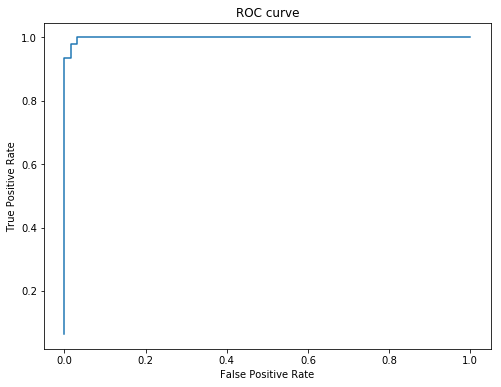

In [390]:
# ROC曲線
auc = sm.roc_curve_auc(X_test, y_test, clf)

In [391]:
# AUC
print("AUC：" + str(auc))

AUC：0.9987297554779295


# ★補足

### SVM（サポートベクターマシーン）
分類にも回帰にも使える教師あり機械学習方法  
局所解収束の問題が無い長所がある

#### 2値分類の場合 
- 汎化能力を高くするためには、できるだけ点と線の距離を広くするように直線を引くのが良い  
- 最も近い点（サポートベクター）との距離を最大化（マージンを最大化）できる線が最適  
- 点と点との距離の帯のことをマージンと呼ぶ（その真ん中が判別のための境界線）  
- サポートベクターは各クラスに少なくとも１つずつ存在  
- この境界線はサポートベクターの位置のみによって決まる

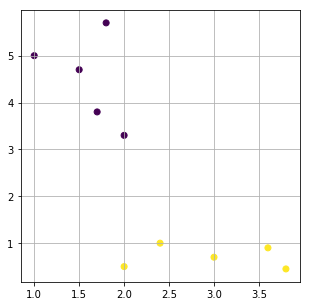

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X=np.zeros([10,2])
# Y=pd.DataFrame(np.random.rand(3,3),columns=["aaa","bbb","ccc"])
X[0]=[1,5]
X[1]=[1.5,4.7]
X[2]=[1.7,3.8]
X[3]=[1.8,5.7]
X[4]=[2,3.3]
X[5]=[2,0.5]
X[6]=[2.4,1]
X[7]=[3,0.7]
X[8]=[3.6,0.9]
X[9]=[3.8,0.45]

category=np.array([0,0,0,0,0,1,1,1,1,1])
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], c=category )
plt.grid()
plt.show()

In [60]:
# 学習
# SVC（Support Vector Classification）：分類のためのSVM
from sklearn.svm import SVC
svm =SVC(kernel='linear')
svm.fit(X, category)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
print(svm.predict([[1, 5]]))



[0]


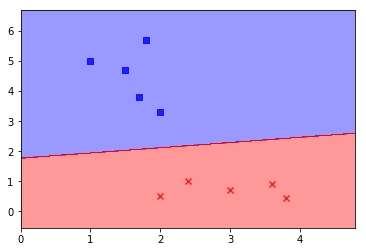

In [61]:
# 領域を可視化
def plot_regions(X, y, classifier, resolution=0.01):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


plot_regions(X, category, classifier=svm)
plt.show()


https://diver.diveintocode.jp/affiliations/textbooks/565  
https://diver.diveintocode.jp/affiliations/textbooks/566  
https://diver.diveintocode.jp/affiliations/textbooks/567

### 回帰への拡張
SVMは回帰に使えるように拡張されている  
**分類で境界線**を引いた作業は、**回帰であればモデルを表す線**を引く作業に対応  
https://diver.diveintocode.jp/affiliations/textbooks/567